# Ghost Rays Analysis
# 3D Printed Collimator

### Milo Buitrago-Casas
### April, 2018

### Summary:

This test was done using the FOXSI optics optics **X4** which is a 7-Shell module that has not been refurbished since FOXSI-I. Data for the Ghost Rays without any collimator at front was taken during our September-2017 visit to the SLF-MSFC. For this measurements, the old blockers were used, i.e. with radius of XXXX and XXXXX for the front and rear blockers respectively. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform

### Scale

In [2]:
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X4_low, Flux_X4_up = [], []
Flux_X4C_low, Flux_X4C_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

### Defining Transparent Color Map:

In [3]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 

### Defining Function to get circular mask:

In [4]:
def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

# 30 arcmin

In [5]:
'''Scale and Center Parameters'''
X, Y = 0., -30.
X0, Y0 = 450, 78 ## Calib Sep 2017
X1, Y1 = 402, 322 ## Calib Mar 2018
angle0 = 0.0
angle1 = -27.5

### X4 7-Shell Alone

In [6]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym30 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p85mA_0arcminX_-30arcminY.fits')
DX4_X0_Ym30 = np.average(FX4_X0_Ym30[0].data, axis=0)
DX4_X0_Ym30 = skimage.transform.rotate(((DX4_X0_Ym30-X4Darks)/(DX4_X0_Ym30-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [7]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym30 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+10arcminX_-30arcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)
DX4C_X0_Ym30 = skimage.transform.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()),angle,center=(X1,Y1))

NameError: name 'angle' is not defined

In [ ]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym30, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym30, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('30 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [ ]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym30[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym30[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [ ]:
# whitout collimator:
h, w = DX4_X0_Ym30.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym30.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym30.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym30.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# 26 arcmin

## X = +10arcmin and Y = -26arcmin

In [ ]:
'''Scale and Center Parameters'''
X, Y = 0., -26.
X0, Y0 = 445, 80 ## Calib Sep 2017
X1, Y1 = 402, 324 ## Calib Mar 2018
angle0 = 1.0
angle1 = -27.5

### X4 7-Shell Alone

In [ ]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym26 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p65mA_0arcminX_-26arcminY.fits')
DX4_X0_Ym26 = np.average(FX4_X0_Ym26[0].data, axis=0)
DX4_X0_Ym26 = skimage.transform.rotate(((DX4_X0_Ym26-X4Darks)/(DX4_X0_Ym26-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [ ]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym26 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p65mA_+10arcminX_-26arcminY.fits')
CD_X0_Ym26 = np.average(CF_Xm0_Ym26[0].data, axis=0)
DX4C_X0_Ym26 = skimage.transform.rotate(((CD_X0_Ym26-DarksC)/(CD_X0_Ym26-DarksC).max()),angle1,center=(X1,Y1))

In [ ]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym26, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym26, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('26 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [ ]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym26[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym26[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [ ]:
# whitout collimator:
h, w = DX4_X0_Ym26.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym26.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym26.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym26.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# 22 arcmin

## X = +10arcmin and Y = -22arcmin

In [8]:
'''Scale and Center Parameters'''
X, Y = 0., -22.
X0, Y0 = 450, 82 ## Calib Sep 2017
X1, Y1 = 397, 327 ## Calib Mar 2018
angle0 = 1.0
angle1 = -35

### X4 7-Shell Alone

In [9]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym22 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p5mA_0arcminX_-22arcminY.fits')
DX4_X0_Ym22 = np.average(FX4_X0_Ym22[0].data, axis=0)
DX4_X0_Ym22 = skimage.transform.rotate(((DX4_X0_Ym22-X4Darks)/(DX4_X0_Ym22-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [10]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym22 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p5mA_+10arcminX_-22arcminY.fits')
CD_X0_Ym22 = np.average(CF_Xm0_Ym22[0].data, axis=0)
DX4C_X0_Ym22 = skimage.transform.rotate(((CD_X0_Ym22-DarksC)/(CD_X0_Ym22-DarksC).max()),angle1,center=(X1,Y1))

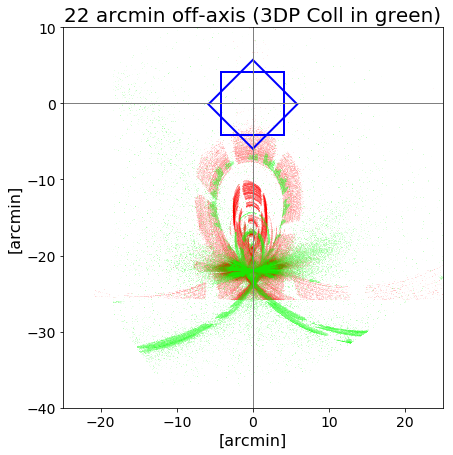

In [11]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym22, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym22, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('22 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [12]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym22[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym22[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [13]:
# whitout collimator:
h, w = DX4_X0_Ym22.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym22.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym22.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym22.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# 18 arcmin

## X = +6arcmin and Y = -18arcmin

In [14]:
'''Scale and Center Parameters'''
X, Y = 0., -18.
X0, Y0 = 450, 82 ## Calib Sep 2017
X1, Y1 = 397, 327 ## Calib Mar 2018
angle0 = 1.0
angle1 = -25

### X4 7-Shell Alone

In [15]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym18 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p3mA_0arcminX_-18arcminY.fits')
DX4_X0_Ym18 = np.average(FX4_X0_Ym18[0].data, axis=0)
DX4_X0_Ym18 = skimage.transform.rotate(((DX4_X0_Ym18-X4Darks)/(DX4_X0_Ym18-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [16]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym18 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p3mA_+6arcminX_-18arcminY.fits')
CD_X0_Ym18 = np.average(CF_Xm0_Ym18[0].data, axis=0)
DX4C_X0_Ym18 = skimage.transform.rotate(((CD_X0_Ym18-DarksC)/(CD_X0_Ym18-DarksC).max()),angle1,center=(X1,Y1))

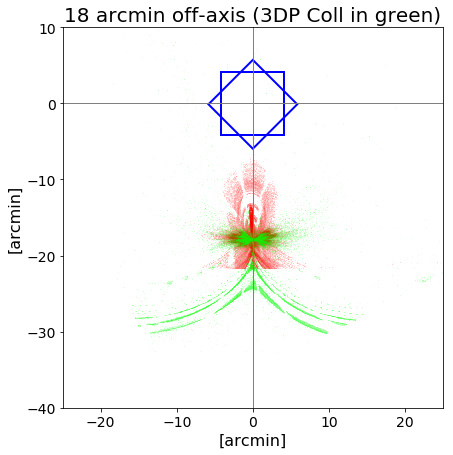

In [17]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym18, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym18, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('18 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [18]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym18[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym18[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [19]:
# whitout collimator:
h, w = DX4_X0_Ym18.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym18.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym18.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym18.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# 14 arcmin

## X = +6arcmin and Y = -14arcmin

In [20]:
'''Scale and Center Parameters'''
X, Y = 0., -14.
X0, Y0 = 449, 86 ## Calib Sep 2017
X1, Y1 = 400, 330 ## Calib Mar 2018
angle0 = 1.0
angle1 = -30

### X4 7-Shell Alone

In [21]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym14 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
DX4_X0_Ym14 = np.average(FX4_X0_Ym14[0].data, axis=0)
DX4_X0_Ym14 = skimage.transform.rotate(((DX4_X0_Ym14-X4Darks)/(DX4_X0_Ym14-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [22]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym14 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p1mA_+6arcminX_-14arcminY.fits')
CD_X0_Ym14 = np.average(CF_Xm0_Ym14[0].data, axis=0)
DX4C_X0_Ym14 = skimage.transform.rotate(((CD_X0_Ym14-DarksC)/(CD_X0_Ym14-DarksC).max()),angle1,center=(X1,Y1))

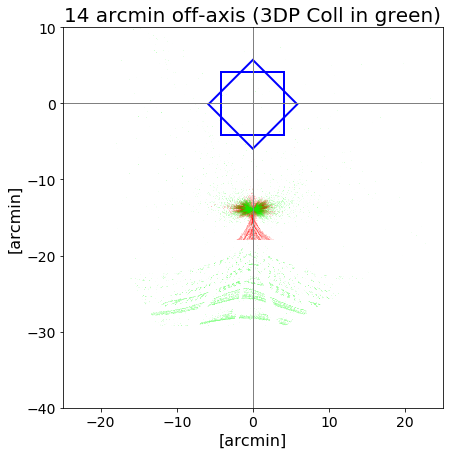

In [23]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym14, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym14, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('14 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [24]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym14[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym14[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [25]:
# whitout collimator:
h, w = DX4_X0_Ym14.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym14.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym14.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym14.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# 10 arcmin

## X = +6arcmin and Y = -10arcmin

In [26]:
'''Scale and Center Parameters'''
X, Y = 0., -10.
X0, Y0 = 448, 88 ## Calib Sep 2017
X1, Y1 = 399, 333 ## Calib Mar 2018
angle0 = 1.0
angle1 = -40

### X4 7-Shell Alone

In [27]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX4_X0_Ym10 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p03mA_0arcminX_-10arcminY.fits')
DX4_X0_Ym10 = np.average(FX4_X0_Ym10[0].data, axis=0)
DX4_X0_Ym10 = skimage.transform.rotate(((DX4_X0_Ym10-X4Darks)/(DX4_X0_Ym10-X4Darks).max()),angle0,center=(X0,Y0))

### X4 7-Shell + 3DP Collimator

In [28]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5
'''Data'''
CF_Xm0_Ym10 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_+6arcminX_-10arcminY.fits')
CD_X0_Ym10 = np.average(CF_Xm0_Ym10[0].data, axis=0)
DX4C_X0_Ym10 = skimage.transform.rotate(((CD_X0_Ym10-DarksC)/(CD_X0_Ym10-DarksC).max()),angle1,center=(X1,Y1))

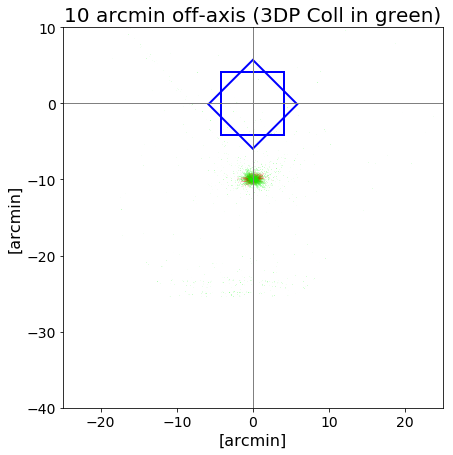

In [29]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4_X0_Ym10, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX4C_X0_Ym10, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('10 arcmin off-axis (3DP Coll in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)

In [30]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X4_low.append(DX4_X0_Ym10[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X4C_low.append(DX4C_X0_Ym10[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [31]:
# whitout collimator:
h, w = DX4_X0_Ym10.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX4_X0_Ym10.copy()
masked_img[~mask] = 0
Flux_X4_up.append(masked_img.sum())

# with collimator:
h, w = DX4C_X0_Ym10.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX4C_X0_Ym10.copy()
masked_imgC[~maskC] = 0
Flux_X4C_up.append(masked_imgC.sum())

# Getting the flux inside the detector

ValueError: x and y must have same first dimension, but have shapes (6,) and (4,)

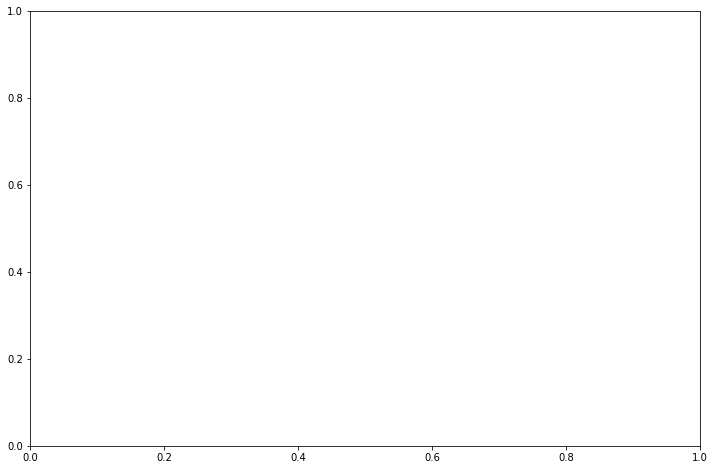

In [32]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,Flux_X4_up/max(Flux_X4_up),'o-',c='r',label='GR X4(7Shell) without 3DPC')
plt.fill_between(offaxis,Flux_X4_up/max(Flux_X4_up),Flux_X4_low/max(Flux_X4_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X4_low/max(Flux_X4_up),'o-',c='r')
plt.plot(offaxis,Flux_X4C_up/max(Flux_X4_up),'o-',c='g',label='GR X4(7Shell) with 3DPC')
plt.fill_between(offaxis,Flux_X4C_up/max(Flux_X4_up),Flux_X4C_low/max(Flux_X4_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X4C_low/max(Flux_X4_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4 w/wo 3DP Collimator',fontsize=24)


# Normalizing by the Flux of the source

In [33]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X4_up)/power,'o-',c='r',label='GR X4(7Shell) without 3DPC')
plt.fill_between(offaxis,np.array(Flux_X4_up)/power,
                 np.array(Flux_X4_low)/power,
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4_low)/power,'o-',c='r')
plt.plot(offaxis,np.array(Flux_X4C_up)/power,'o-',c='g',label='GR X4(7Shell) with 3DPC')
plt.fill_between(offaxis,np.array(Flux_X4C_up)/power,
                 np.array(Flux_X4C_low)/power,
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4C_low)/power,'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Power corrected flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4 w/wo 3DP Collimator',fontsize=24)
plt.ylim([-0.1,6.1])

ValueError: operands could not be broadcast together with shapes (4,) (6,) 

<Figure size 864x576 with 0 Axes>

# Same plot but now normalized for each off-axis angle

(-0.05, 1.05)

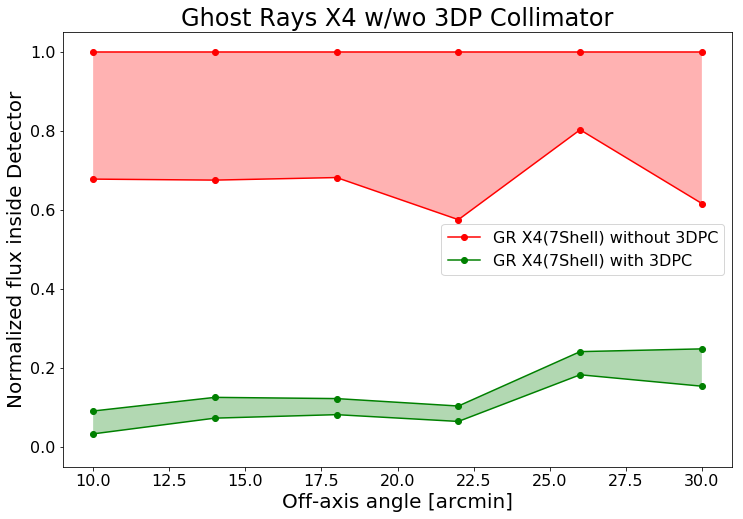

In [760]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X4_up)/np.array(Flux_X4_up),'o-',c='r',label='GR X4(7Shell) without 3DPC')
plt.fill_between(offaxis,np.array(Flux_X4_up)/np.array(Flux_X4_up),
                 np.array(Flux_X4_low)/np.array(Flux_X4_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4_low)/np.array(Flux_X4_up),'o-',c='r')
plt.plot(offaxis,np.array(Flux_X4C_up)/np.array(Flux_X4_up),'o-',c='g',label='GR X4(7Shell) with 3DPC')
plt.fill_between(offaxis,np.array(Flux_X4C_up)/np.array(Flux_X4_up),
                 np.array(Flux_X4C_low)/np.array(Flux_X4_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X4C_low)/np.array(Flux_X4_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X4 w/wo 3DP Collimator',fontsize=24)
plt.ylim([-0.05,1.05])

# Trash! please do not read what is below

### Can we normalized this image respect to flux of the source?

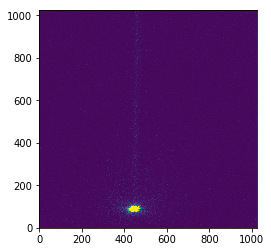

In [675]:
plt.imshow(DX4_X0_Ym10,origin='lower',vmax=0.01)

In [682]:
CX0, CY0 = int(X0), int(Y0)
CX1, CY1 = int(X1), int(Y1)
M0 = DX4_X0_Ym10[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)]
M1 = DX4C_X0_Ym10[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)]

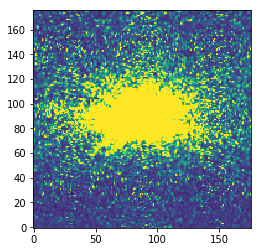

In [683]:
plt.imshow(M0,origin='lower',vmax=0.001)

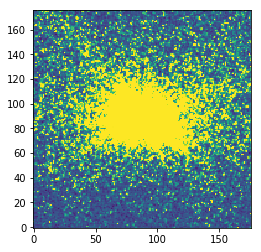

In [684]:
plt.imshow(M1,origin='lower',vmax=0.001)

In [685]:
M0.sum(), M1.sum()

(67.76558164178073, 69.28433995953318)

In [687]:
Flux_X4_up

[169.12158573571782,
 108.24201533845601,
 49.11796158449226,
 18.46059108833222,
 7.1109791221099385,
 2.6468214602961773]

## X = 0 arcmin , Y = -22 arcmin

In [70]:
'''Scale and Center Parameters'''
X, Y = 0., -22.
X0, Y0 = 401, 326 ## Calib Mar 2018
X1, Y1 = 448, 82 ## Calib Sep 2017

In [101]:
# Darks
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/Darks/darks_9Sx6run2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5

'''Off-axis coordinates'''
X = 0
Y = -22
'''Data'''
FX4_X0_Ym30 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X4-7Shells/CCD/rawdata/GhostRays/FOXSI3_X4_T9Sx6_CCD_30kV_0p5mA_0arcminX_-22arcminY.fits')
DX4_X0_Ym30 = np.average(FX4_X0_Ym30[0].data, axis=0)

DX4 = (DX4_X0_Ym30-X4Darks)/(DX4_X0_Ym30-X4Darks).max()+3e-2

In [102]:
# Darks
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p03mA_-14arcminX_-10arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/Dark_FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p85mA_+14arcminX_-30arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
DarksC = (Darks1 + Darks2)*0.5

'''Off-axis coordinates'''
X = 0
Y = -22
'''Data'''
CF_Xm0_Ym30 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X4-7Shells+3DPCollimator/CCD/Ghost_Rays/FOXSI3_X4+3DC_CCD_T9Sx6_30kV_0p5mA_0arcminX_-22arcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)

angle = -6.9
DX4C = ndimage.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()+3e-2),angle)



(-40, 10)

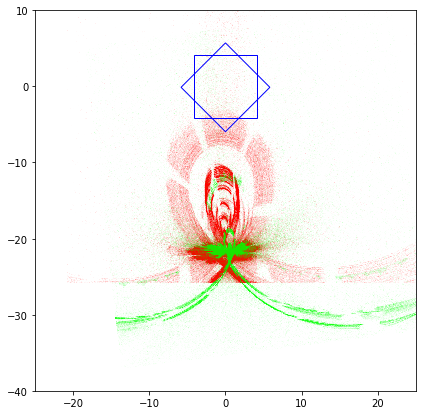

In [103]:
Xshift = X0-X1

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX4, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.031,vmax=0.05)

ax.imshow(DX4C, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol+Xshift)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.03,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=1,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=1,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))

# Important
## Change the rotation axis. Center to on-axis

# Priorities

0
60
120
180
240


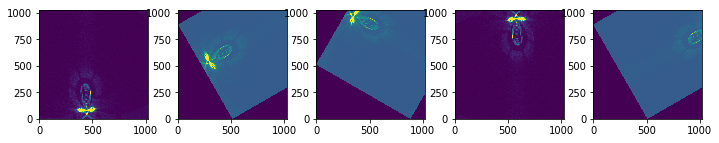

In [113]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

#img = scipy.misc.lena()
plt.figure(figsize=(12, 2))

for degree in range(5):
    plt.subplot(151+degree)
    #print(degree*60)
    rotated_img = scipy.ndimage.rotate(DX4, degree*60)
    plt.imshow(rotated_img,vmax=0.1,origin='lower')
    plt.xlim((0,1023))
    plt.ylim((0,1023))
    #plt.axis('off')

plt.show()


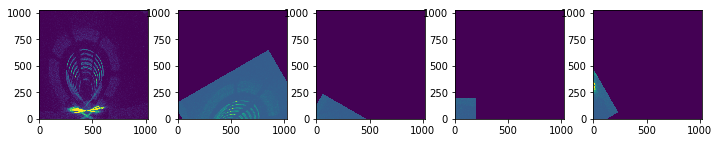

In [36]:
import skimage.transform
plt.figure(figsize=(12, 2))

#test = 2*np.ones((1024,1024))
for degree in range(5):
    plt.subplot(151+degree)
    #print(degree*60)
    rotated_img = skimage.transform.rotate(DX4/DX4.max(), degree*60, center=(100,100))
    plt.imshow(rotated_img,vmax=0.1,origin='lower')
    plt.xlim((0,1023))
    plt.ylim((0,1023))
    #plt.axis('off')

plt.show()


In [34]:
skimage.transform.rotate?

In [89]:
DX4.dtype = 'float64'

In [108]:
DX4 = DX4/DX4.max()

In [109]:
DX4.shape, test.shape, test.max(), DX4.max(), test.min(), DX4.min()

((1024, 1024), (1024, 1024), 2.0, 1.0, 2.0, 0.026704678)

In [90]:
DX4.shape, test.shape, test.max(), DX4.max(), test.min(), DX4.min()

((1024, 512),
 (1024, 1024),
 2.0,
 0.008677149175075486,
 2.0,
 2.4682425531539617e-15)

In [106]:
skimage.transform.rotate(test, 60)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
au = skimage.transform.rotate(DX4C/DX4C.max(), -6.9,center=(402,337))

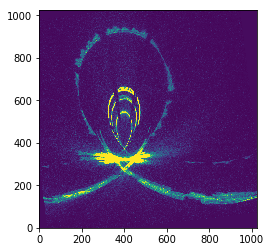

In [67]:
plt.imshow(au,origin='lower',vmax=0.03)